In [3]:
import pandas as pd
import numpy as np

In [4]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('CDNOW_master.txt',names = columns,sep = '\s+')

In [5]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [6]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [7]:
#处理时间列
df['order_dt'] = pd.to_datetime(df.order_dt,format = "%Y%m%d")
df['month'] = df.order_dt.values.astype('datetime64[M]')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
user_id           69659 non-null int64
order_dt          69659 non-null datetime64[ns]
order_products    69659 non-null int64
order_amount      69659 non-null float64
month             69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


# 进行用户消费趋势的分析（按月）

In [9]:
#每月消费金额，每月的消费次数，每月的产品购买量，每月的消费人数
group_month = df.groupby('month')
order_month_amount = group_month.order_amount.sum()
order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

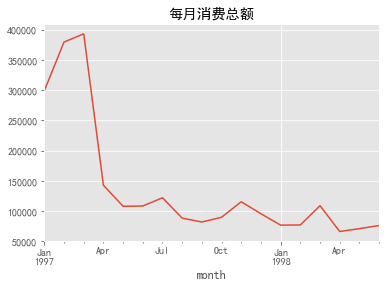

In [10]:
#一般显示数据用图表，接下来进行可视化
import matplotlib.pyplot as plt
%matplotlib inline
#修改设计风格
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.title('每月消费总额')
order_month_amount.plot()

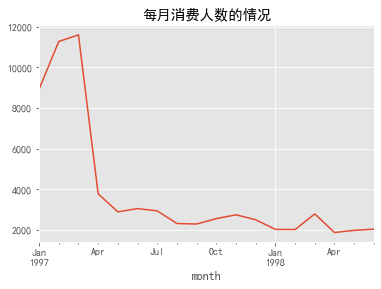

In [11]:
#每月消费人数的情况
plt.title('每月消费人数的情况')
group_month.user_id.count().plot()

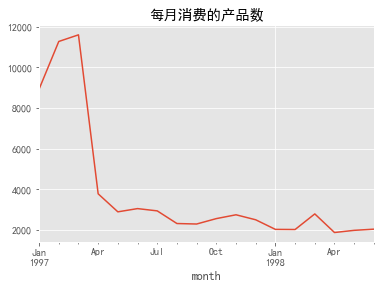

In [12]:
plt.title('每月消费的产品数')
group_month.order_products.count().plot()

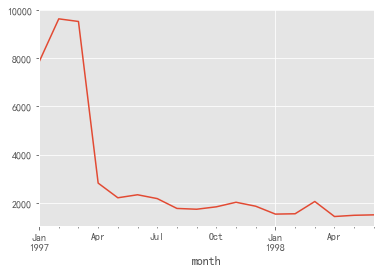

In [13]:
#按月的人数，因为可能1个月里进行多次消费，所以要进行去重操作
df.groupby('month').user_id.apply(lambda x : len(x.drop_duplicates())).plot()

In [14]:
#数据透视表
#一次性求出所有想要的值，使用aggfunc,可以针对不同的值，使用不同的函数
df.pivot_table(index = 'month',
               values = ['order_products','order_amount','user_id'],
               aggfunc = {'order_products':'sum',
                         'order_amount':'sum',
                         'user_id':'count'})

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895
1997-06-01,108395.87,7301,3054
1997-07-01,122078.88,8131,2942
1997-08-01,88367.69,5851,2320
1997-09-01,81948.80,5729,2296


# 用户个体消费分析  
    -用户消费金额，消费次数的描述统计
    -用户消费金额和次数的散点图
    -用户消费金额的分布图
    -用户消费次数的分布图
    -用户累计消费金额占比（百分之几的用户占了百分之多少的消费额）

In [15]:
group_user = df.groupby('user_id')

In [16]:
group_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


In [17]:
#平均数是7，但是中位数只有3，也就是说有小部分的客户购买了大量的CD，用户平均消费106元，但是中位数只有43元，说明存在极值。

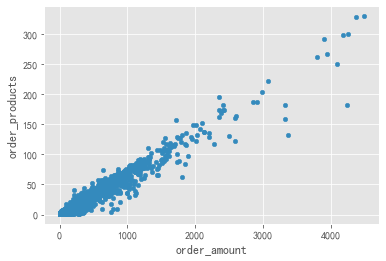

In [18]:
#消费金额在4500以内的每个用户消费情况
group_user.sum().query('order_amount < 4500').plot.scatter(x = 'order_amount',y = 'order_products')

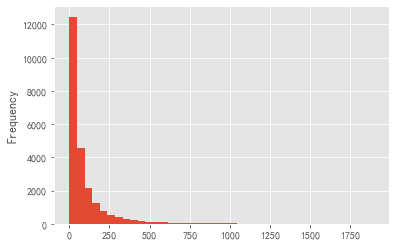

In [19]:
group_user.sum().query('order_products <100').order_amount.plot.hist(bins=40)

In [20]:
#上面的直方图可以看出，大部分的用户，也还是存在于低消费档次。只有少部分的极值存在。

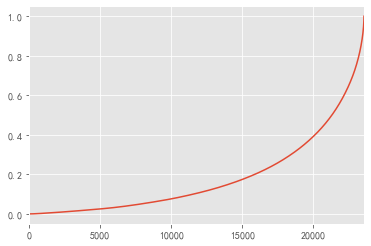

In [21]:
#cumsum是累加值,用累加值除以所有用户消费总金额
user_cumsum = group_user.sum().sort_values('order_amount').apply(lambda x :x.cumsum()/x.sum())
#user_cumsum
user_cumsum.reset_index().order_amount.plot()

In [22]:
#由上图可知，前一半的用户贡献了大约15%的消费额，后面的用户贡献了大部分的消费额，比如最后一部分的用户，贡献了60%的消费额。

# 用户消费行为
    -用户第一次消费（首购）
    -用户最后一次消费
    -新老用户消费比
    -多少用户只消费了一次，每月新客占比？
    -用户分层
        -RFM。新，老，活跃，回流，流失
    -用户购买周期（按订单）
    用户消费周期描述，用户周期分布
    -用户生命周期（第一次消费，到最后一次）
    用户生命周期描述，用户生命周期分布

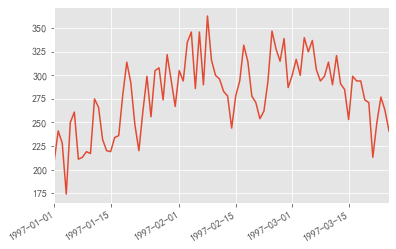

In [25]:
group_user.min().order_dt.value_counts().plot()

In [27]:
#用户第一次购买分布集中在前三个。其中2月中到3月初有几次剧烈的波动。

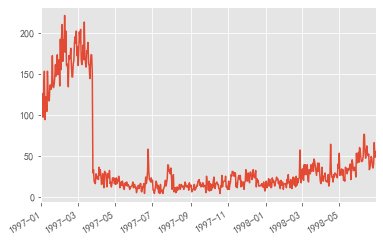

In [28]:
#最近一次消费
group_user.max().order_dt.value_counts().plot()

In [29]:
#用户最后一次购买比第一次购买分布广，大部分最后一次购买还是分布在前三个月，证明，很多用户购买一次之后不在购买了。

In [30]:
#多少用户仅消费了一次
user_life = group_user.order_dt.agg(['min','max'])
user_life

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03
...,...,...
23566,1997-03-25,1997-03-25
23567,1997-03-25,1997-03-25
23568,1997-03-25,1997-04-22


In [31]:
#有多少用户消费了仅一次
(user_life['min'] == user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

In [33]:
#RFM 模型（用户消费额，最近的一次消费，用户消费次数。）
RFM = df.pivot_table(index = 'user_id',
                     values = ['order_products','order_amount','order_dt'],
                     aggfunc = {'order_dt':'max',
                               'order_amount':'sum',
                               'order_products':'sum'})
RFM

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29
...,...,...,...
23566,36.00,1997-03-25,2
23567,20.97,1997-03-25,1
23568,121.70,1997-04-22,6


In [34]:
-(RFM.order_dt - RFM.order_dt.max())

user_id
1       545 days
2       534 days
3        33 days
4       200 days
5       178 days
          ...   
23566   462 days
23567   462 days
23568   434 days
23569   462 days
23570   461 days
Name: order_dt, Length: 23570, dtype: timedelta64[ns]

In [37]:
#最近一次消费数据转化,把单位days，消除
RFM['R'] = -(RFM.order_dt - RFM.order_dt.max()) /np.timedelta64(1,'D')
RFM.rename(columns={'order_amount':'M','order_products':'F'},inplace=True)
RFM

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0
...,...,...,...,...
23566,36.00,1997-03-25,2,462.0
23567,20.97,1997-03-25,1,462.0
23568,121.70,1997-04-22,6,434.0


In [42]:
#给RFM模型建立不同的维度，给用户分组
RFM[['R','F','M']].apply(lambda x:x-x.mean())

,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574
...,...,...,...
23566,94.778362,-5.122656,-70.080426
23567,94.778362,-6.122656,-85.110426
23568,66.778362,-1.122656,15.619574


In [40]:
#给RFM模型建议不同维度，将用户分组
def RFM_func(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'
    }
    result = d[label]
    return result

RFM['label'] = RFM[['R','F','M']].apply(lambda x:x-x.mean()).apply(RFM_func, axis = 1)

In [41]:
RFM

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户
2,89.00,1997-01-12,6,534.0,一般挽留客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般发展客户
5,385.61,1998-01-03,29,178.0,重要保持客户
...,...,...,...,...,...
23566,36.00,1997-03-25,2,462.0,一般挽留客户
23567,20.97,1997-03-25,1,462.0,一般挽留客户
23568,121.70,1997-04-22,6,434.0,重要挽留客户


In [43]:
#不同维度的用户消费占比
RFM.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,196971.23,13977,591108.0
一般挽留客户,438291.81,29346,6951815.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,45785.01,2023,56636.0
重要挽留客户,33028.40,1263,114482.0


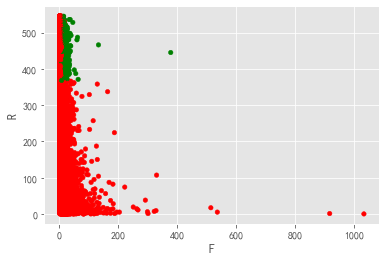

In [52]:
RFM.loc[RFM.label == '重要价值客户','color'] = 'g'
RFM.loc[~(RFM.label == '重要价值客户'),'color'] ='r'
RFM.plot.scatter('F','R',c = RFM.color)

In [53]:
RFM.head()

,M,order_dt,F,R,label,color
user_id,,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户,r
2,89.00,1997-01-12,6,534.0,一般挽留客户,r
3,156.46,1998-05-28,16,33.0,重要保持客户,r
4,100.50,1997-12-12,7,200.0,一般发展客户,r
5,385.61,1998-01-03,29,178.0,重要保持客户,r
